In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer  # Import the SimpleImputer class


In [2]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.strip()  # Remove leading and trailing whitespaces
    return df

# Function to perform data cleaning, normalization, and feature selection for a dataset
def process_dataset(dataset_file):
    # Load the dataset
    df = pd.read_csv(dataset_file)

    # Clean column names
    df = clean_column_names(df)

    # Drop rows with missing values in the 'Label' column
    df.dropna(subset=['Label'], inplace=True)

    # Extract the 'Label' column before normalization
    labels = df['Label']
    df.drop(columns=['Label'], inplace=True)

    # Check for and remove infinite or very large values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Handle missing values using mean imputation on all numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

    # Normalize the data (excluding 'Label' column)
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # Remove constant features before feature selection
    constant_features = df.columns[df.nunique() == 1]
    df.drop(columns=constant_features, inplace=True)

    # Combine the 'Label' column back with the processed data
    df['Label'] = labels

    return df


# Directory containing all the datasets
dataset_directory = "E:/MINI PROJECT/MachineLearningCSV/MachineLearningCVE/"

# List all the files in the directory
dataset_files = os.listdir(dataset_directory)

# Process and combine all datasets
datasets = [process_dataset(os.path.join(dataset_directory, file)) for file in dataset_files]
combined_data = pd.concat(datasets)

# Display individual datasets
for i, file in enumerate(dataset_files):
    dataset_name = os.path.splitext(file)[0]
    df = datasets[i]
    print(f"\nDataset {i+1}: {dataset_name}")
    print(df.head())

    # Display number of rows and columns for each dataset
    num_rows, num_cols = df.shape
    print(f"Number of rows: {num_rows}, Number of columns: {num_cols}\n")


Dataset 1: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.837225   3.333335e-08           0.000518                 0.00000   
1          0.840109   9.166671e-07           0.000000                 0.00034   
2          0.840124   4.416669e-07           0.000000                 0.00034   
3          0.705548   2.916668e-07           0.000000                 0.00034   
4          0.837194   3.333335e-08           0.000518                 0.00000   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.000066                     0.000000   
1                     0.000033                     0.000001   
2                     0.000033                     0.000001   
3                     0.000033                     0.000001   
4                     0.000066                     0.000000   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0 

In [3]:
#PREPROCESSING ON COMBINED DATASET



# Reset the index of the combined dataset
combined_data.reset_index(drop=True, inplace=True)

# Handle missing values in the combined dataset
numeric_columns = combined_data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
combined_data[numeric_columns] = imputer.fit_transform(combined_data[numeric_columns])

# Normalize the combined dataset (excluding 'Label' column)
scaler = MinMaxScaler()
combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

# Remove constant features before feature selection
constant_features = combined_data.columns[combined_data.nunique() == 1]
combined_data.drop(columns=constant_features, inplace=True)

# Drop rows with missing values in the 'Label' column
combined_data.dropna(subset=['Label'], inplace=True)

# Apply feature selection using SelectKBest to the combined dataset
num_features = 20  # Choose the number of top features you want to keep
selector = SelectKBest(score_func=f_classif, k=num_features)
X_new = selector.fit_transform(combined_data.drop(columns=['Label']), combined_data['Label'])
selected_features = combined_data.drop(columns=['Label']).columns[selector.get_support()]

# Combine the 'Label' column back with the selected features
selected_features = list(selected_features) + ['Label']
combined_data = combined_data[selected_features]

# Display the column names of the updated combined dataset (including the 'Label' column)
print("\nColumn names of the updated combined dataset:")
print(combined_data.columns)

# Display the combined dataset with the selected features and the 'Label' column
print("\nCombined Dataset with Selected Features:")
print(combined_data.head())

# Count the occurrences of each unique value in the 'Label' column
attack_counts = combined_data['Label'].value_counts()

# Display the count of different attacks
print(attack_counts)

# Display number of rows and columns for the updated combined dataset
num_rows, num_cols = combined_data.shape
print(f"\nNumber of rows in the updated combined dataset: {num_rows}")
print(f"Number of columns in the updated combined dataset: {num_cols}")


Column names of the updated combined dataset:
Index(['Flow Duration', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Std', 'Flow IAT Max',
       'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'PSH Flag Count', 'Average Packet Size', 'Avg Bwd Segment Size',
       'Idle Mean', 'Idle Max', 'Idle Min', 'Label'],
      dtype='object')

Combined Dataset with Selected Features:
   Flow Duration  Bwd Packet Length Max  Bwd Packet Length Mean  \
0   3.333335e-08               0.000000                0.000000   
1   9.166671e-07               0.000514                0.001034   
2   4.416669e-07               0.000514                0.001034   
3   2.916668e-07               0.000514                0.001034   
4   3.333335e-08               0.000000                0.000000   

   Bwd Packet Length Std  Flow Bytes/s  Flow IAT Std  


Dataset: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX
First few rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.837225   3.333335e-08           0.000518                 0.00000   
1          0.840109   9.166671e-07           0.000000                 0.00034   
2          0.840124   4.416669e-07           0.000000                 0.00034   
3          0.705548   2.916668e-07           0.000000                 0.00034   
4          0.837194   3.333335e-08           0.000518                 0.00000   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.000066                     0.000000   
1                     0.000033                     0.000001   
2                     0.000033                     0.000001   
3                     0.000033                     0.000001   
4                     0.000066                     0.000000   

   Fwd Packet Length Max  Fwd Packet Length Min 

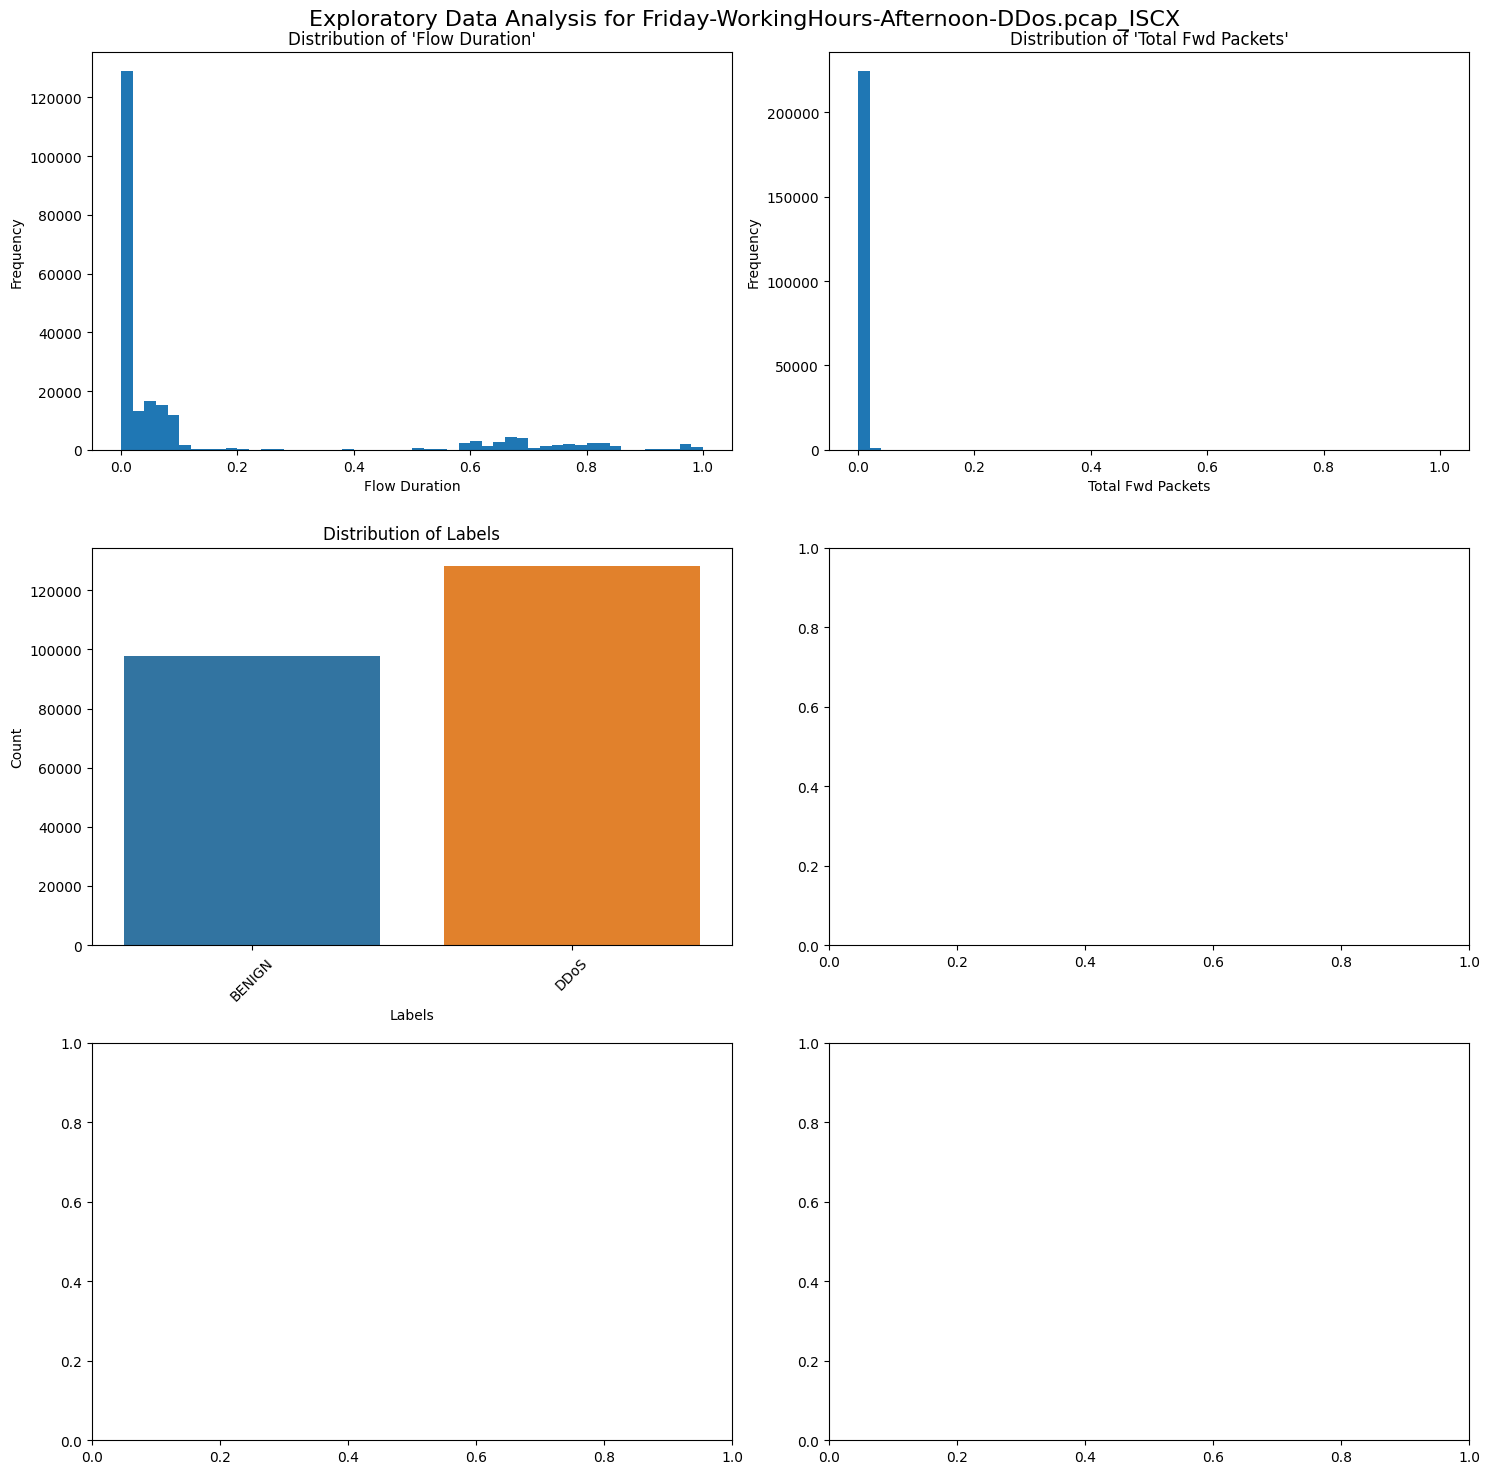

-------------------------

Dataset: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX
First few rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.000336   1.055296e-02           0.012829                0.012105   
1          0.000336   1.099472e-02           0.012829                0.012105   
2          0.000336   1.441667e-06           0.000000                0.000275   
3          0.000336   1.086251e-02           0.012829                0.011554   
4          0.541314   7.500002e-07           0.000000                0.000550   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.011466                     0.000972   
1                     0.011466                     0.000972   
2                     0.000000                     0.000000   
3                     0.011741                     0.000928   
4                     0.000000                     0.000000   

   Fwd Packet Leng

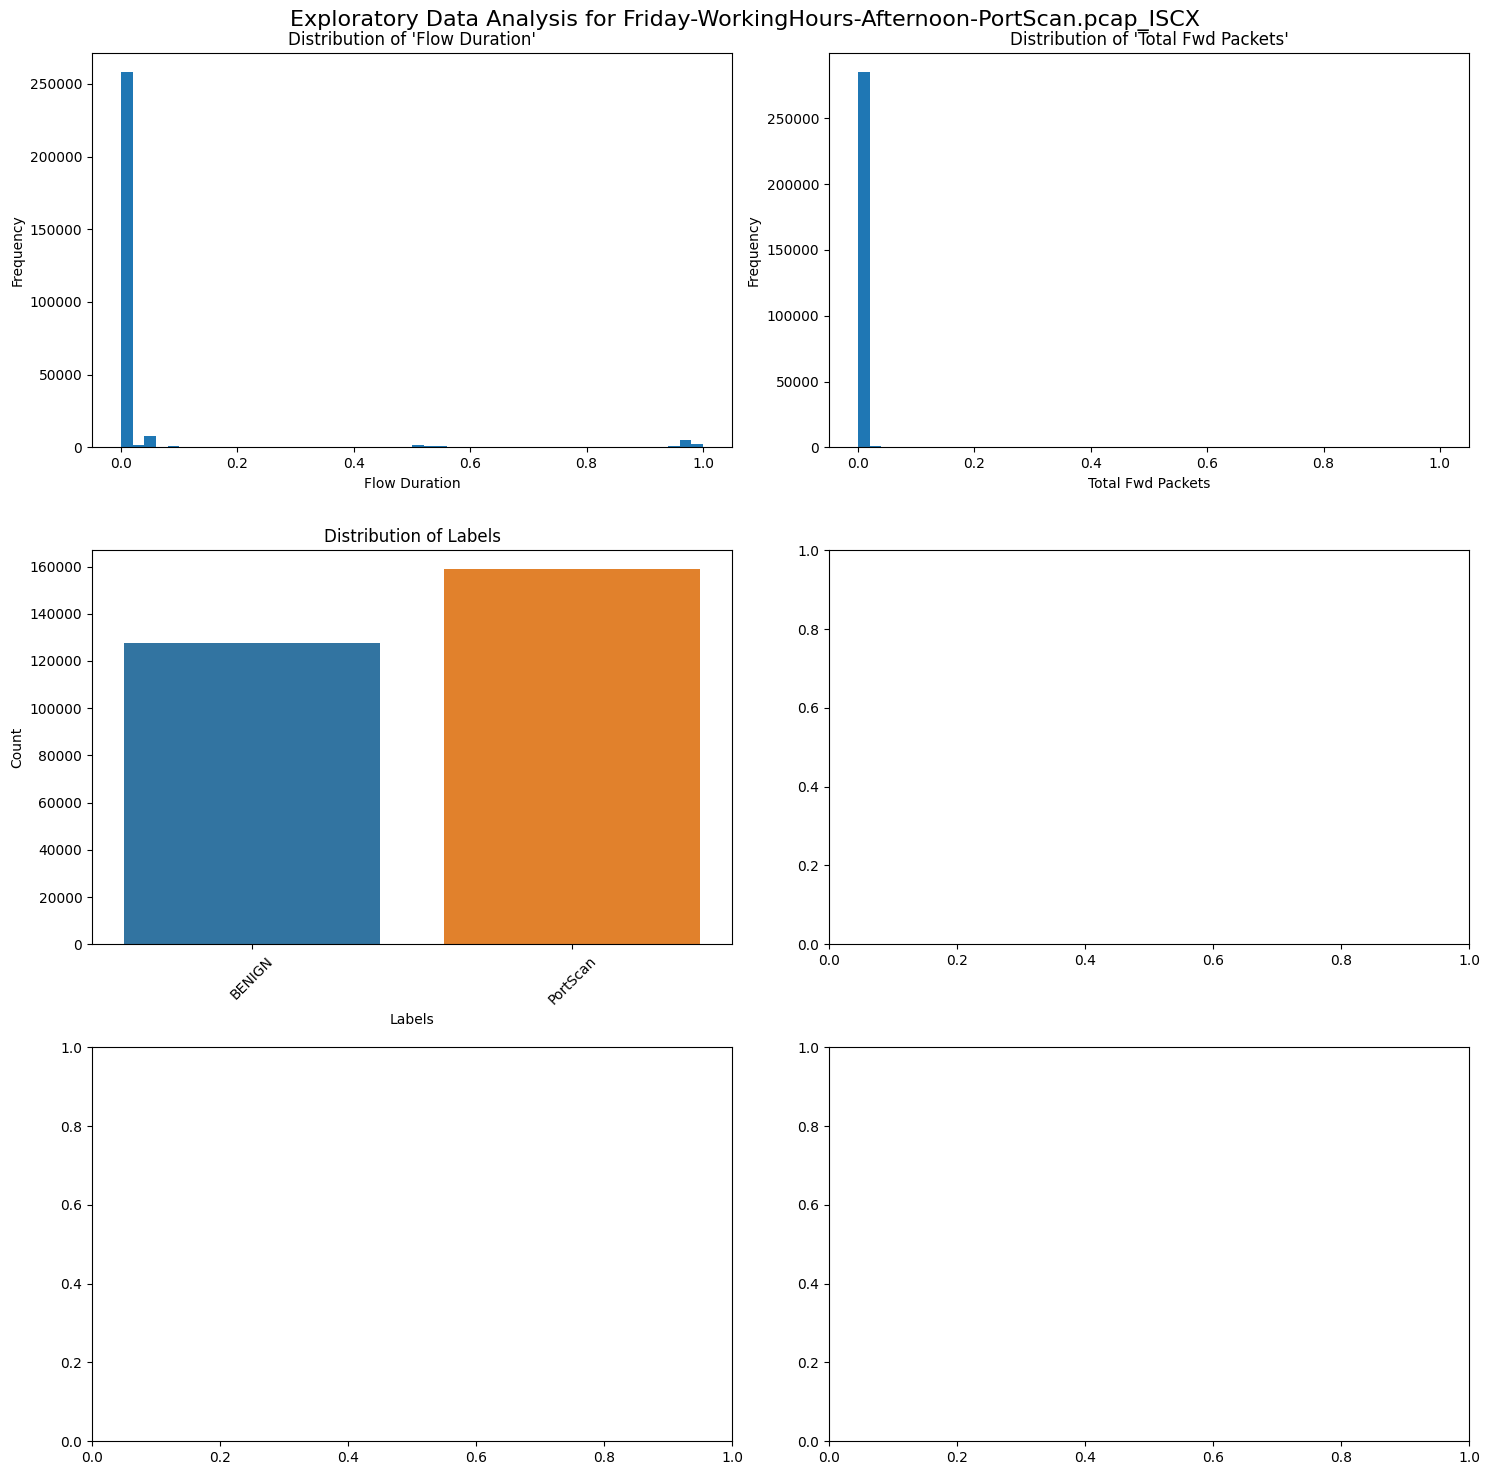

-------------------------

Dataset: Friday-WorkingHours-Morning.pcap_ISCX
First few rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.050317       0.939506           0.000149                0.000056   
1          0.005989       0.939505           0.000149                0.000056   
2          0.000000       0.947978           0.002616                0.000000   
3          0.082451       0.000834           0.000101                0.000000   
4          0.000000       0.000456           0.000014                0.000000   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.005220                     0.000002   
1                     0.005220                     0.000008   
2                     0.000000                     0.000000   
3                     0.000499                     0.000000   
4                     0.000000                     0.000000   

   Fwd Packet Length Max  Fwd

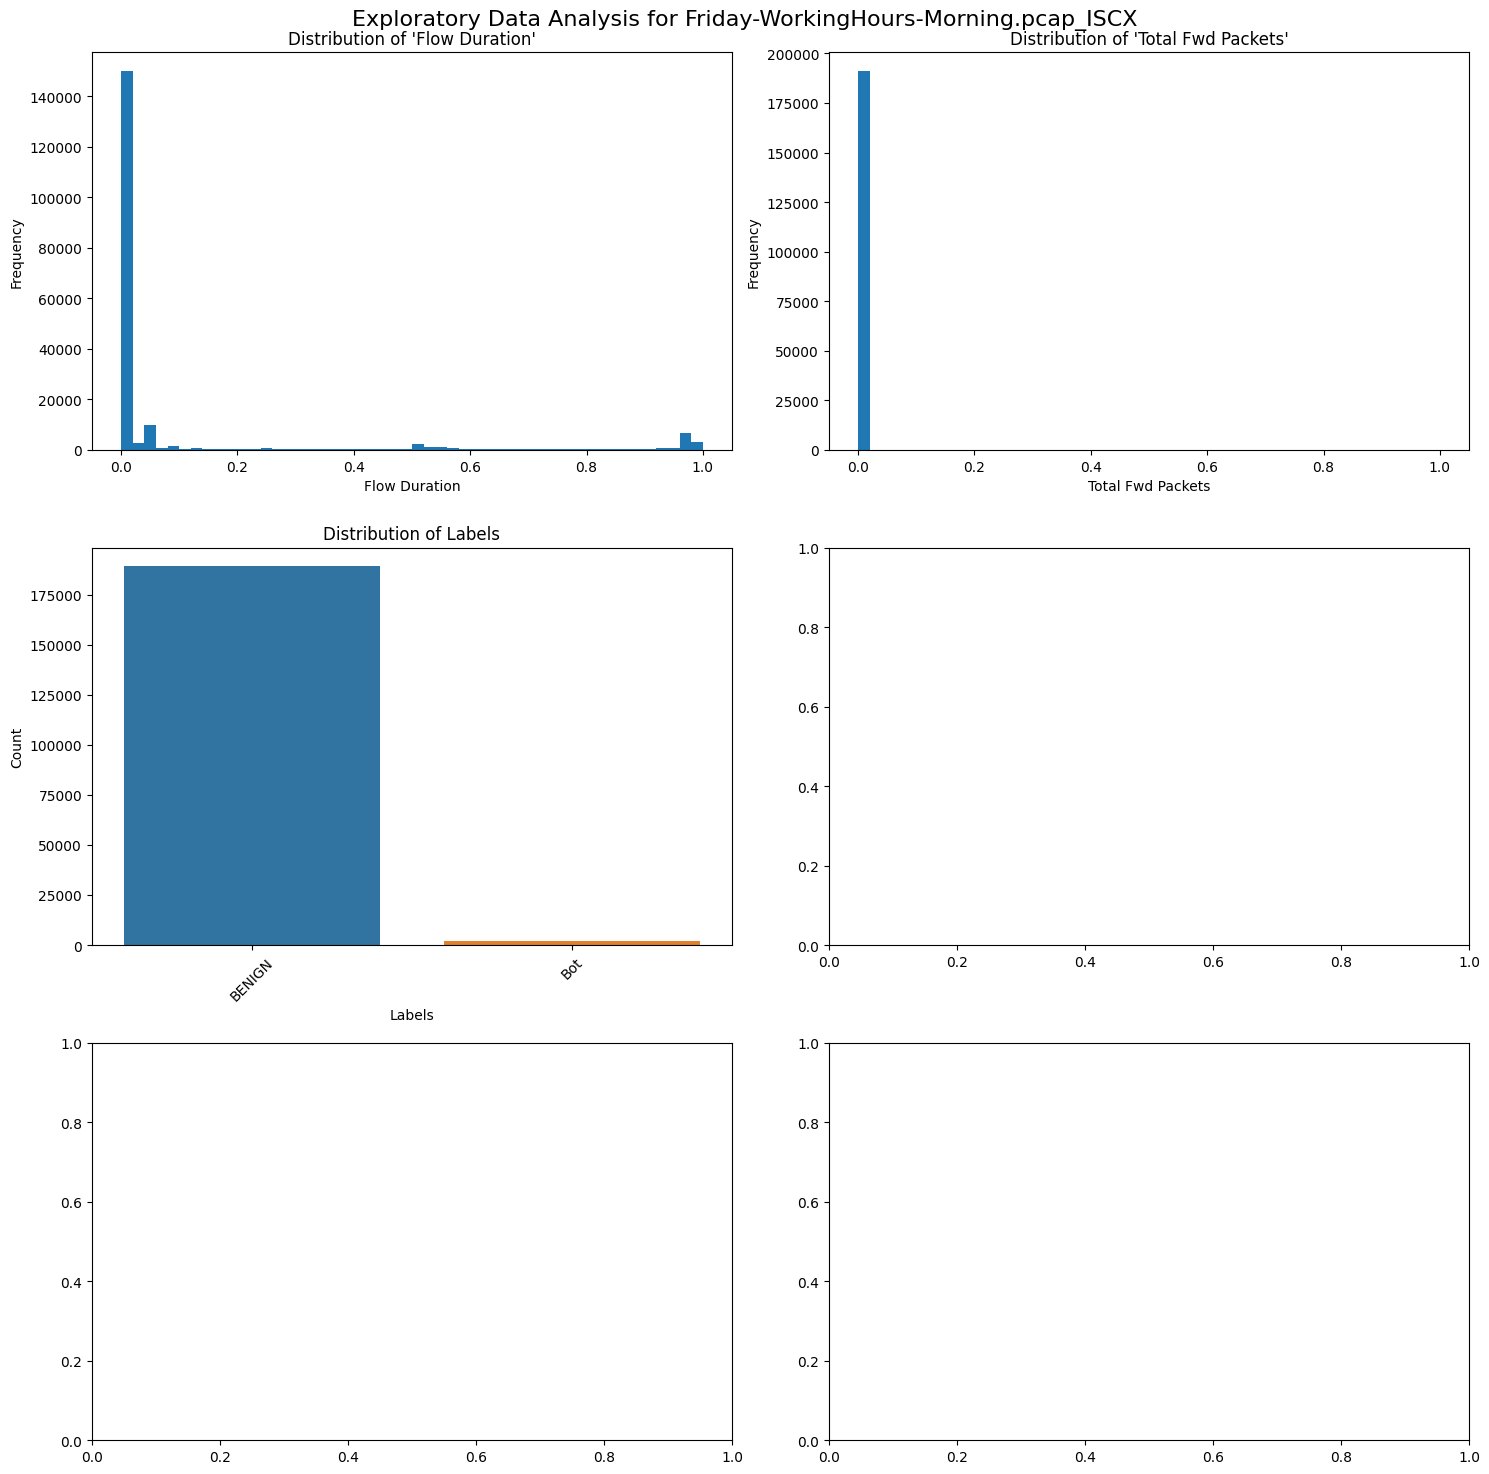

-------------------------

Dataset: Monday-WorkingHours.pcap_ISCX
First few rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.750561   4.166667e-08           0.000005                     0.0   
1          0.750561   1.666667e-08           0.000005                     0.0   
2          0.750561   1.666667e-08           0.000005                     0.0   
3          0.750561   1.666667e-08           0.000005                     0.0   
4          0.755108   3.333334e-08           0.000005                     0.0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.000009                          0.0   
1                     0.000009                          0.0   
2                     0.000009                          0.0   
3                     0.000009                          0.0   
4                     0.000009                          0.0   

   Fwd Packet Length Max  Fwd Packet 

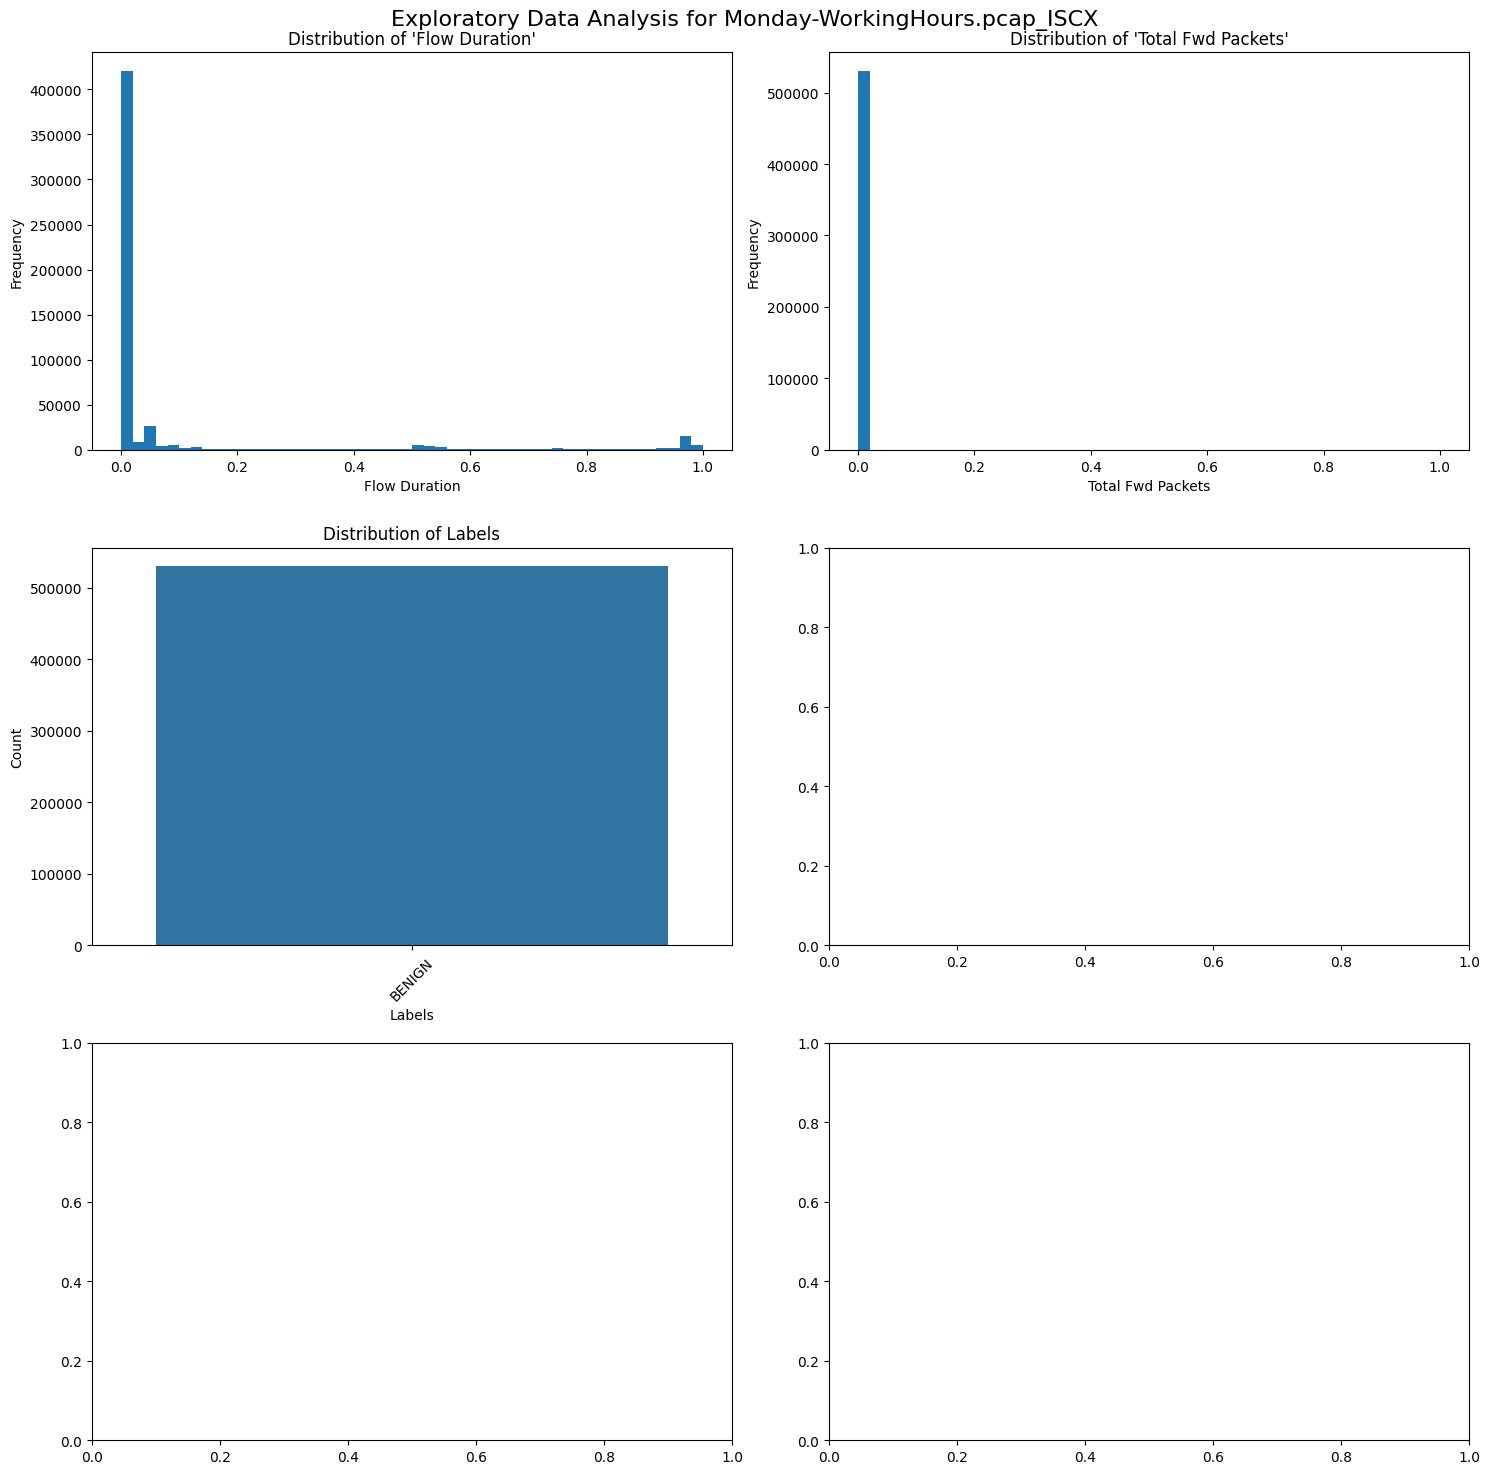

-------------------------

Dataset: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX
First few rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.000336   1.400001e-06            0.00000                0.000022   
1          0.917828   7.083337e-07            0.00000                0.000045   
2          0.001877   8.329088e-04            0.00000                0.000022   
3          0.001877   3.084918e-04            0.00000                0.000022   
4          0.000000   9.263450e-01            0.00644                0.000000   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.000000                 0.000000e+00   
1                     0.000000                 0.000000e+00   
2                     0.000004                 7.547170e-07   
3                     0.000004                 7.547170e-07   
4                     0.000000                 0.000000e+00   

   Fwd Pack

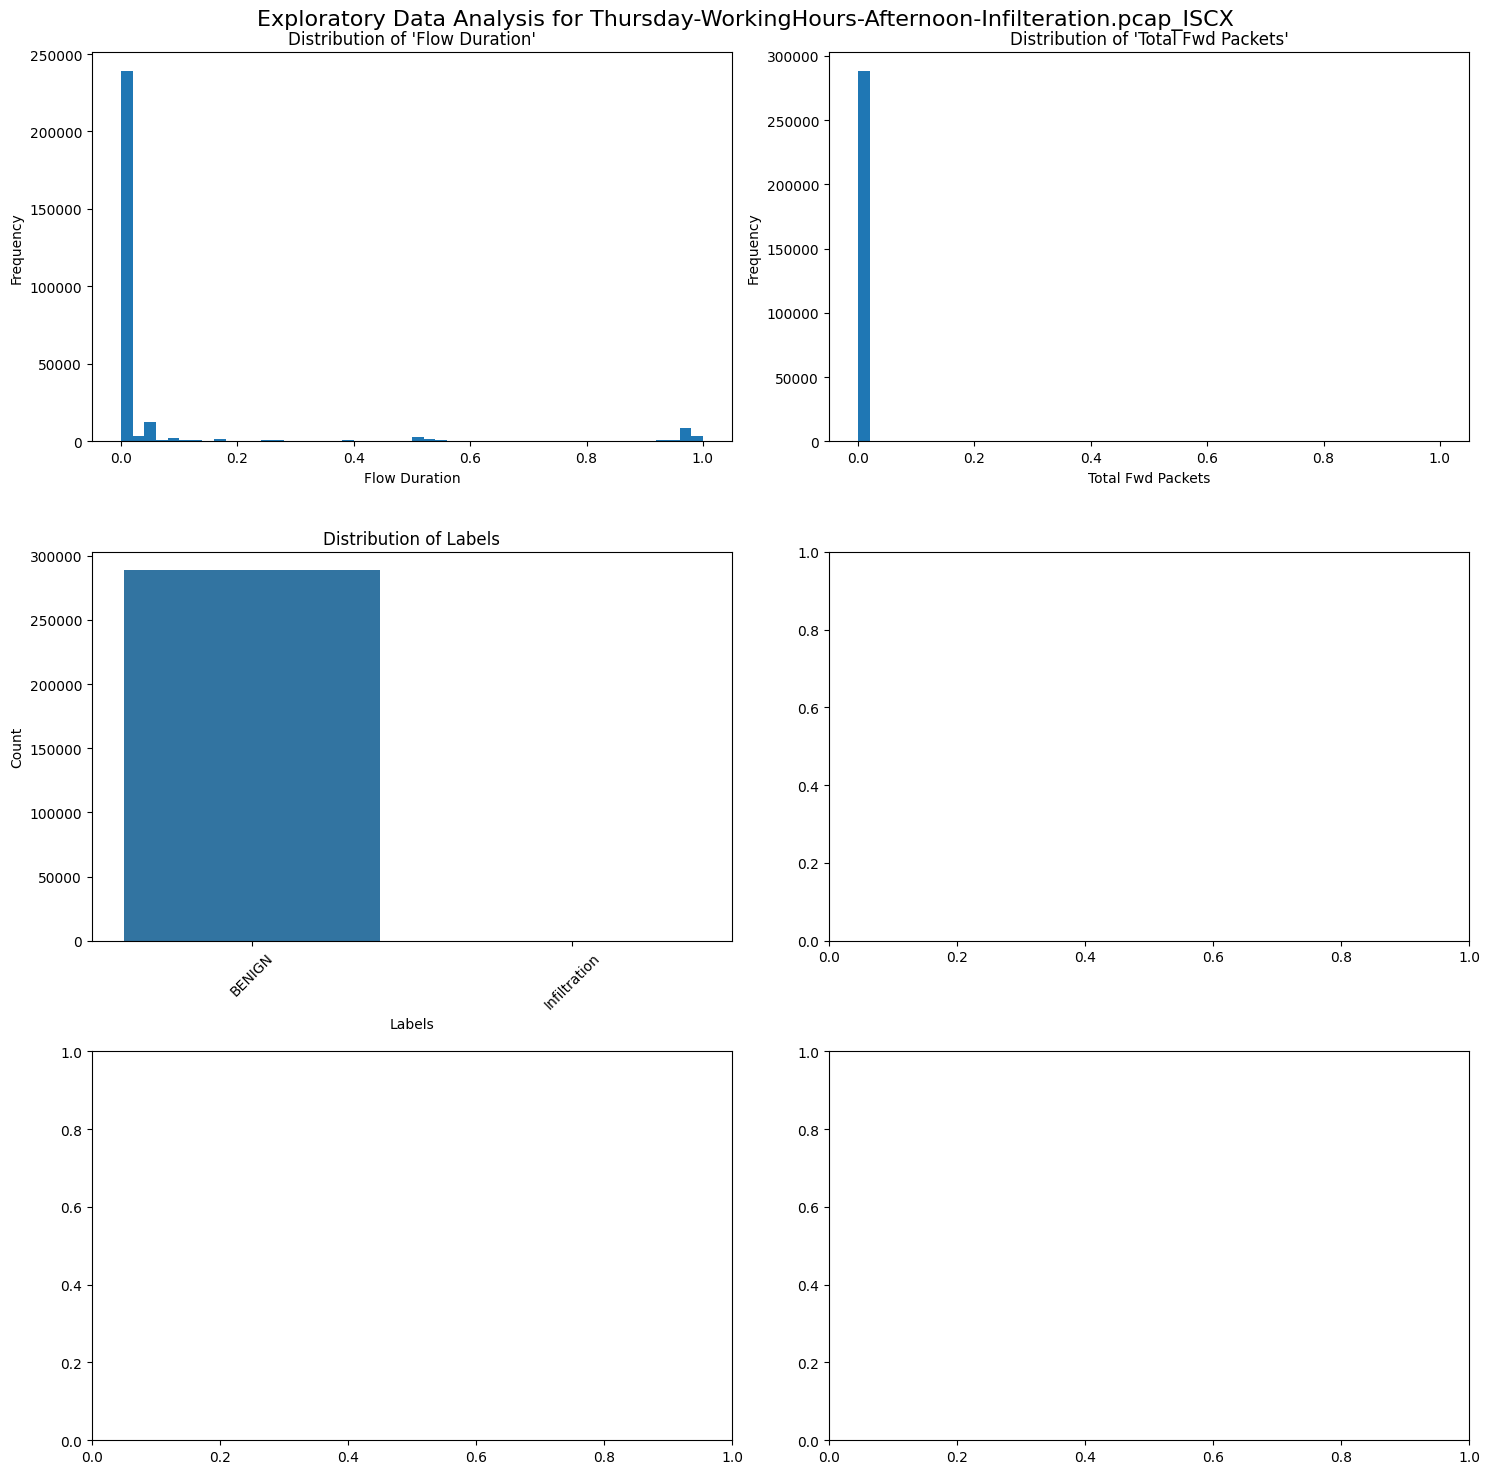

-------------------------

Dataset: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX
First few rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.005936       0.942462           0.000234                0.000089   
1          0.005936       0.945614           0.000334                0.000148   
2          0.000000       0.999546           0.000742                0.000000   
3          0.006760       0.502183           0.000040                0.000026   
4          0.000809       0.000002           0.000005                0.000007   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.008076                 1.596810e-05   
1                     0.009492                 2.028389e-05   
2                     0.000000                 0.000000e+00   
3                     0.001946                 6.732057e-06   
4                     0.000085                 5.135566e-07   

   Fwd Packet Le

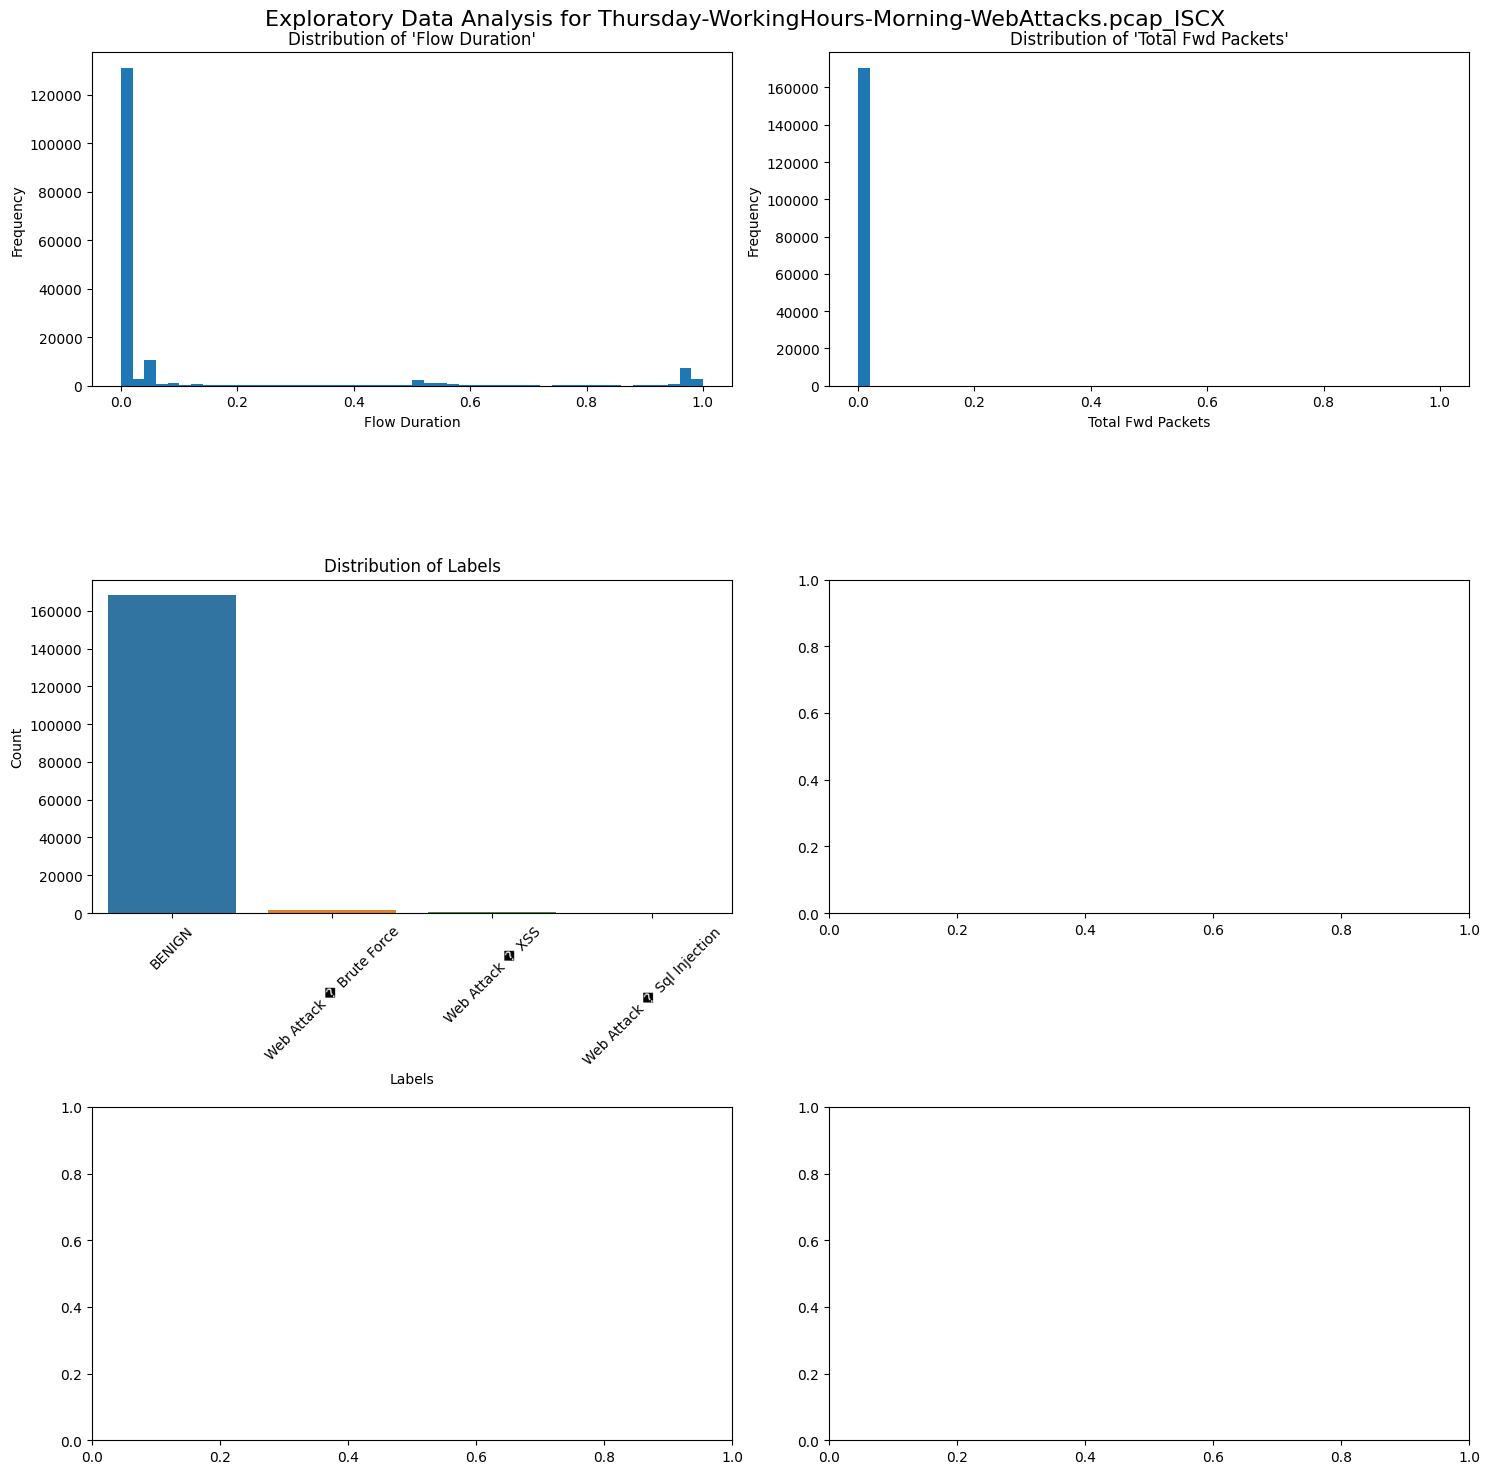

-------------------------

Dataset: Tuesday-WorkingHours.pcap_ISCX
First few rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.001343       0.000005           0.000029                0.000014   
1          0.001343       0.000008           0.000039                0.000014   
2          0.001343       0.000010           0.000029                0.000014   
3          0.001343       0.000004           0.000029                0.000014   
4          0.001343       0.000006           0.000039                0.000014   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.000181                 5.709729e-07   
1                     0.000247                 4.695375e-06   
2                     0.001143                 4.513557e-06   
3                     0.000186                 5.901116e-07   
4                     0.000252                 4.695375e-06   

   Fwd Packet Length Max  Fwd Packet

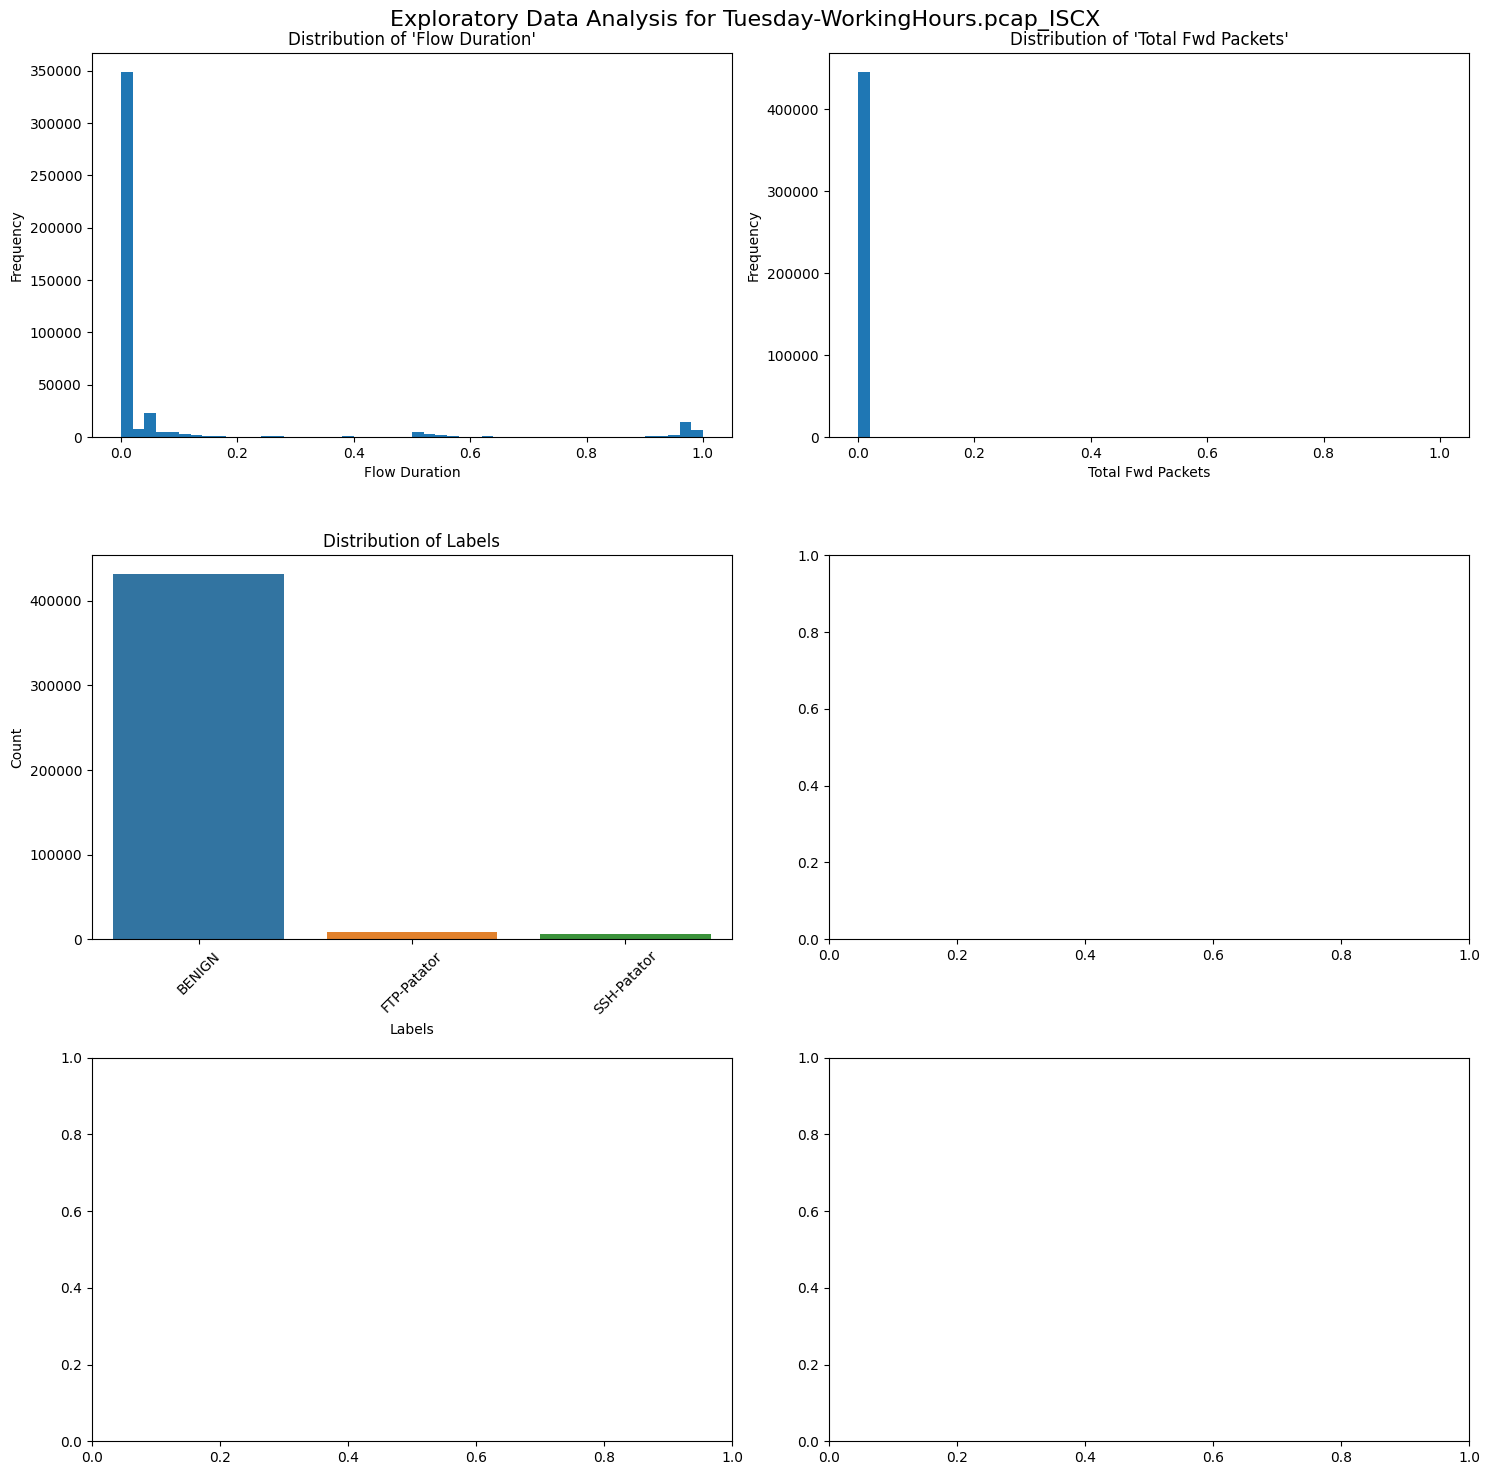

-------------------------

Dataset: Wednesday-workingHours.pcap_ISCX
First few rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.001222       0.000319           0.000000                0.000004   
1          0.005940       0.000004           0.000049                0.000018   
2          0.001344       0.000009           0.000044                0.000022   
3          0.005940       0.000127           0.000078                0.000044   
4          0.001344       0.000009           0.000039                0.000022   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                     0.000005                 9.569378e-09   
1                     0.000141                 5.199362e-07   
2                     0.002573                 5.023923e-06   
3                     0.002820                 1.062201e-05   
4                     0.002573                 5.027113e-06   

   Fwd Packet Length Max  Fwd Pack

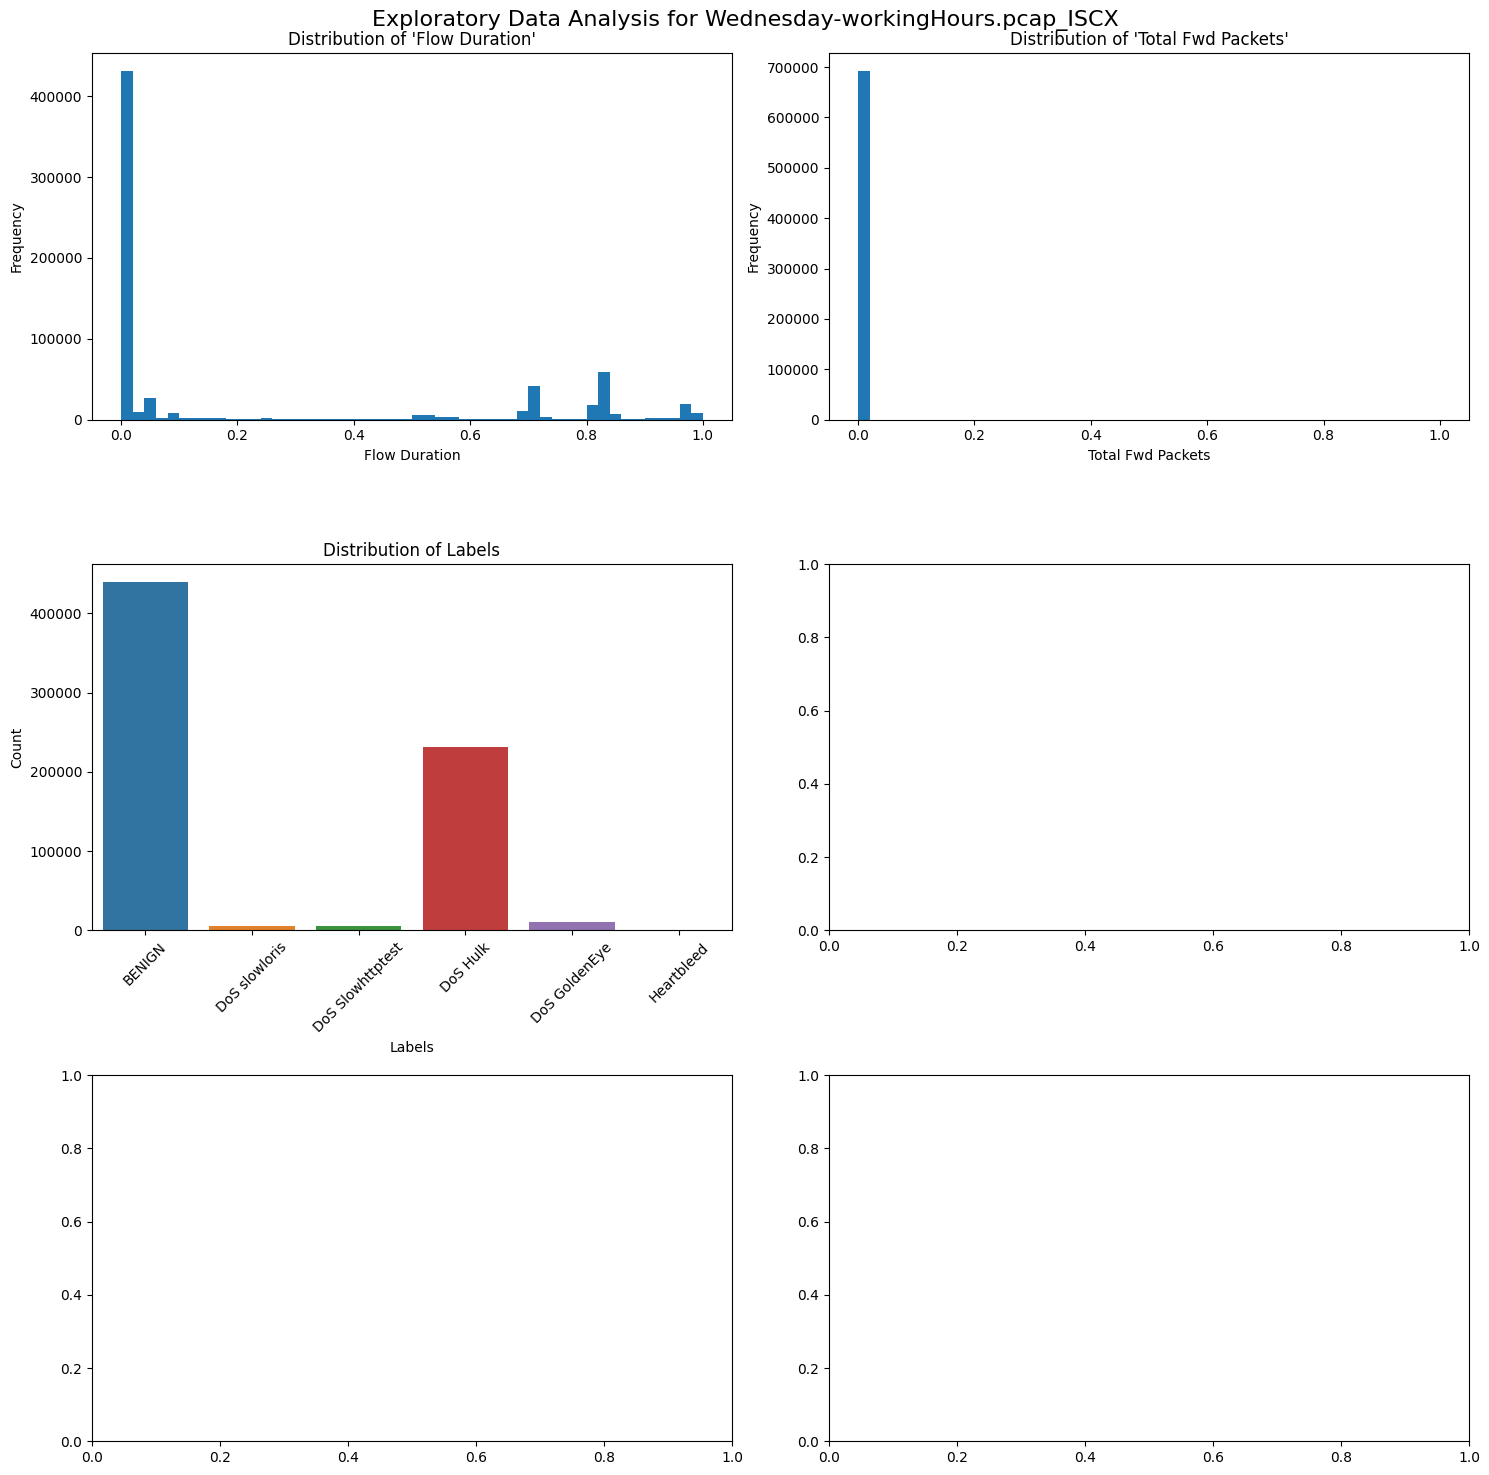

-------------------------


In [4]:
#
#  EXPLANATORY DATA ANALYSIS
#


# Function to perform basic EDA on a dataset
def perform_eda(dataset, dataset_name):
    # Create a new figure with multiple subplots
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle(f"Exploratory Data Analysis for {dataset_name}", fontsize=16)

    # Display the first few rows of the dataset
    print(f"\nDataset: {dataset_name}")
    print("First few rows of the dataset:")
    print(dataset.head(), "\n")

    # Display the total number of rows and columns
    print("Number of rows and columns:")
    print(dataset.shape)

    # Check for missing values
    print("\nMissing values:")
    print(dataset.isnull().sum())

    # Get statistical summary
    print("\nStatistical summary:")
    print(dataset.describe())

    # Visualize the distribution of 'Flow Duration'
    axes[0, 0].hist(dataset['Flow Duration'], bins=50)
    axes[0, 0].set_title("Distribution of 'Flow Duration'")
    axes[0, 0].set_xlabel('Flow Duration')
    axes[0, 0].set_ylabel('Frequency')

    # Visualize the distribution of 'Total Fwd Packets'
    axes[0, 1].hist(dataset['Total Fwd Packets'], bins=50)
    axes[0, 1].set_title("Distribution of 'Total Fwd Packets'")
    axes[0, 1].set_xlabel('Total Fwd Packets')
    axes[0, 1].set_ylabel('Frequency')

    # Additional visualizations (customize as needed)
    sns.countplot(x='Label', data=dataset, ax=axes[1, 0])  # Change here
    axes[1, 0].set_title("Distribution of Labels")
    axes[1, 0].set_xlabel('Labels')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()

# Perform EDA on individual datasets
for i, file in enumerate(dataset_files):
    dataset_name = os.path.splitext(file)[0]
    df = datasets[i]
    perform_eda(df, dataset_name)
    print("-------------------------")

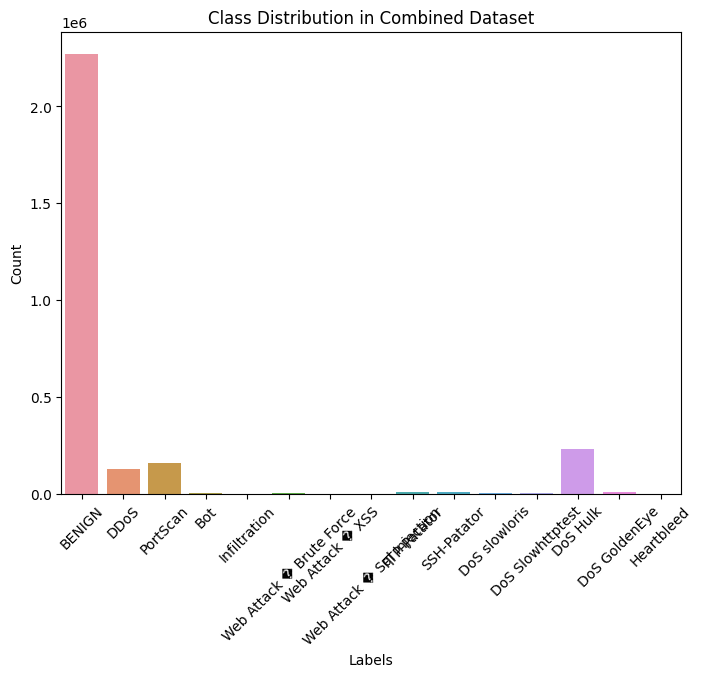

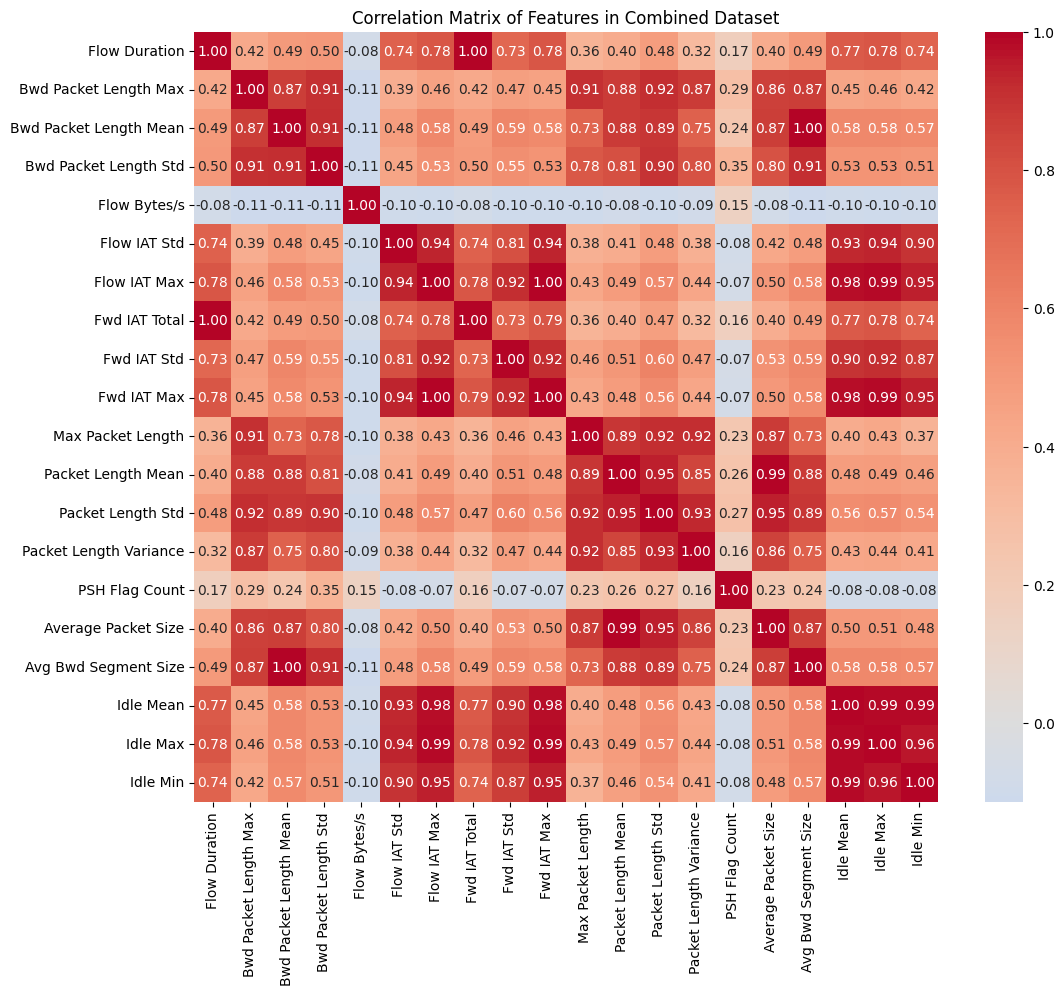

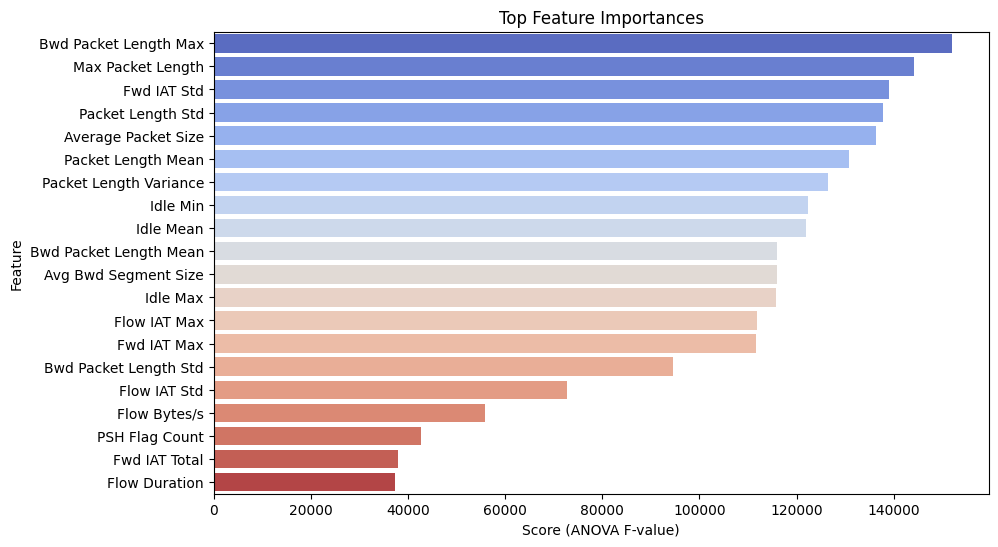

In [5]:
#
#        ADVANCED EDA ON COMBINED DATASET
#


plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=combined_data)
plt.title("Class Distribution in Combined Dataset")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Compute correlation matrix for the combined dataset
correlation_matrix = combined_data.drop(columns=['Label']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Matrix of Features in Combined Dataset")
plt.show()

# Apply feature selection using SelectKBest to the combined dataset
num_features = 20  # Choose the number of top features you want to keep
selector = SelectKBest(score_func=f_classif, k=num_features)
X_new = selector.fit_transform(combined_data.drop(columns=['Label']), combined_data['Label'])

# Get feature importances from SelectKBest
feature_importance = selector.scores_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = combined_data.drop(columns=['Label']).columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot the feature importances for the top num_features features
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance[:num_features], y=sorted_features[:num_features], palette="coolwarm")
plt.title("Top Feature Importances")
plt.xlabel("Score (ANOVA F-value)")
plt.ylabel("Feature")
plt.show()

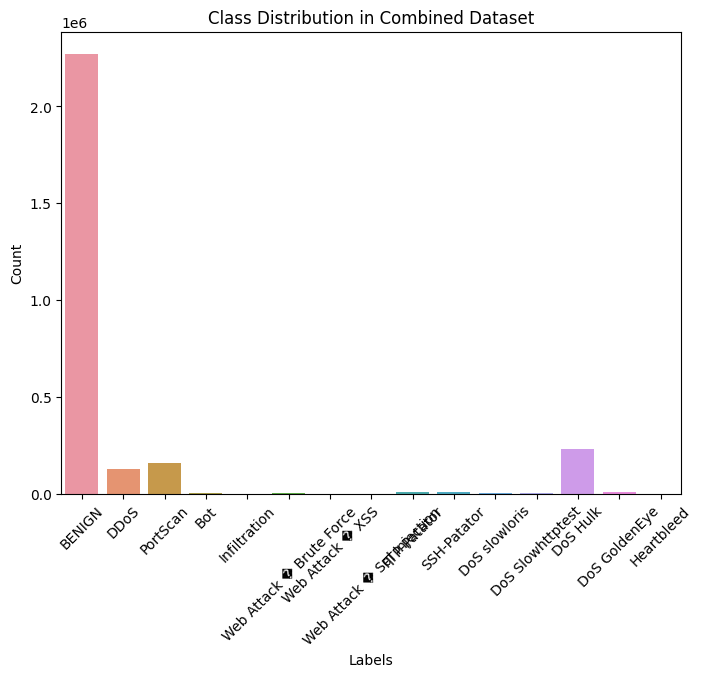

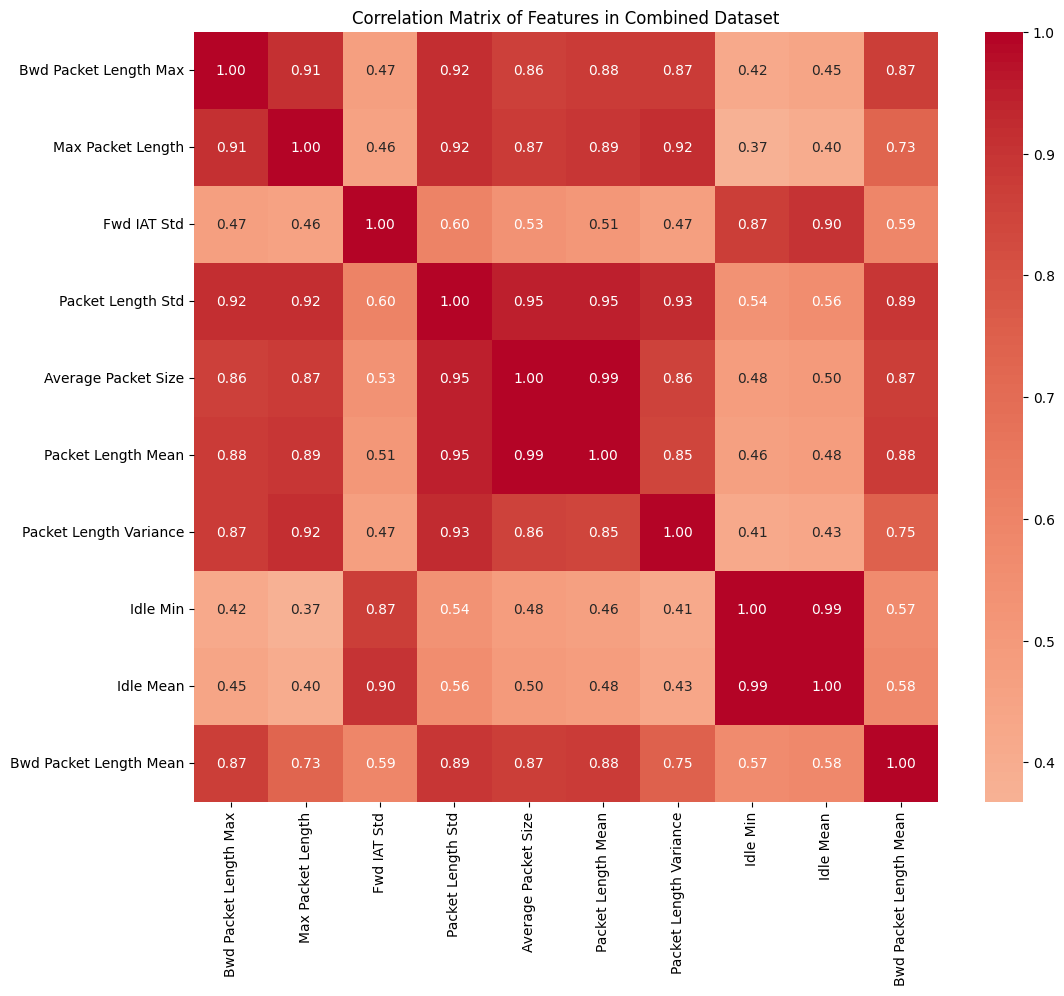

In [6]:


# Apply feature selection using SelectKBest to the combined dataset
num_features = 10  # Choose the number of top features you want to keep
selector = SelectKBest(score_func=f_classif, k=num_features)
X_new = selector.fit_transform(combined_data.drop(columns=['Label']), combined_data['Label'])

# Get feature importances from SelectKBest
feature_importance = selector.scores_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = combined_data.drop(columns=['Label']).columns[sorted_idx]

# Create a new dataset with the top 10 features and the target column 'Label'
selected_features = sorted_features[:num_features].to_list()
selected_features.append('Label')  # Add the target column 'Label'
dataset_with_selected_features = combined_data[selected_features]

# Save the new dataset as CSV in your directory
# Replace "YOUR_DIRECTORY_PATH" with the actual path where you want to save the dataset
output_path = "D:/Python files/Mini Project/combined_data_with_10_features.csv"
dataset_with_selected_features.to_csv(output_path, index=False)

# Perform Advanced EDA on the combined dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=dataset_with_selected_features)
plt.title("Class Distribution in Combined Dataset")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Compute correlation matrix for the combined dataset
correlation_matrix = dataset_with_selected_features.drop(columns=['Label']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Matrix of Features in Combined Dataset")
plt.show()

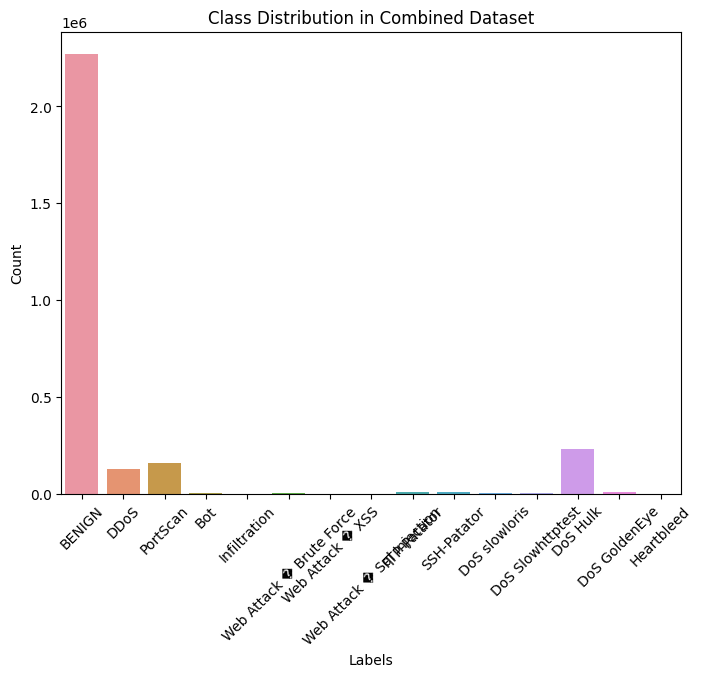

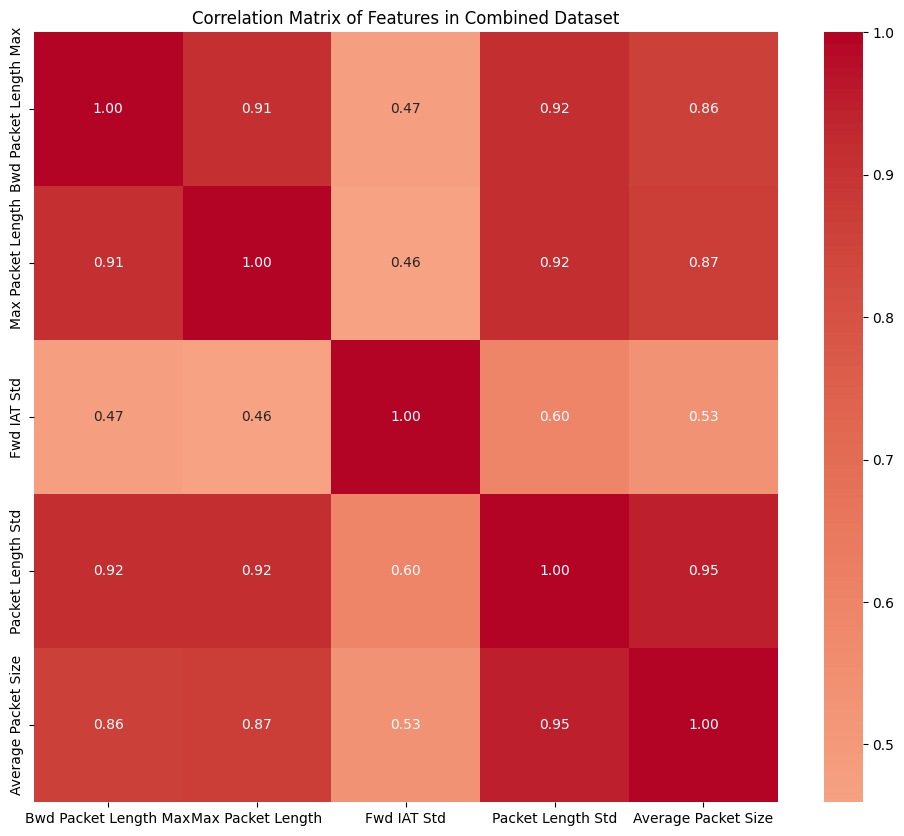

In [7]:

# Apply feature selection using SelectKBest to the combined dataset
num_features = 5  # Choose the number of top features you want to keep
selector = SelectKBest(score_func=f_classif, k=num_features)
X_new = selector.fit_transform(combined_data.drop(columns=['Label']), combined_data['Label'])

# Get feature importances from SelectKBest
feature_importance = selector.scores_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = combined_data.drop(columns=['Label']).columns[sorted_idx]

# Create a new dataset with the top 10 features and the target column 'Label'
selected_features = sorted_features[:num_features].to_list()
selected_features.append('Label')  # Add the target column 'Label'
dataset_with_selected_features_5 = combined_data[selected_features]

# Save the new dataset as CSV in your directory
# Replace "YOUR_DIRECTORY_PATH" with the actual path where you want to save the dataset
output_path = "D:/Python files/Mini Project/combined_data_with_5_features.csv"
dataset_with_selected_features_5.to_csv(output_path, index=False)

# Perform Advanced EDA on the combined dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=dataset_with_selected_features_5)
plt.title("Class Distribution in Combined Dataset")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Compute correlation matrix for the combined dataset
correlation_matrix = dataset_with_selected_features_5.drop(columns=['Label']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Matrix of Features in Combined Dataset")
plt.show()

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from joblib import parallel_backend

# Load the dataset (assuming the dataset is in the same directory as the code file)
dataset_file = "D:\Python files\Mini Project\combined_data_with_5_features.csv"
dtype_mapping = {
    # Provide the data types for columns if known
    # For example:
    # 'Column1': np.int32,
    # 'Column2': np.float64,
}
combined_data = pd.read_csv(dataset_file, dtype=dtype_mapping)

# Separate features and labels
X = combined_data.drop(columns=['Label']).values  # Convert to NumPy array
y = combined_data['Label'].values  # Convert to NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps in a pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Apply preprocessing to the training data
with parallel_backend('threading'):  # Use 'threading' for parallel processing
    X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Initialize the Random Forest classifier
with parallel_backend('threading'):  # Use 'threading' for parallel processing
    rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)  # n_jobs=-1 enables parallel processing

# Train the model on the resampled training data
rf_model.fit(X_resampled, y_resampled)

# Apply preprocessing to the test data
with parallel_backend('threading'):  # Use 'threading' for parallel processing
    X_test_preprocessed = preprocessor.transform(X_test)

# Make predictions on the test data
with parallel_backend('threading'):  # Use 'threading' for parallel processing
    y_pred = rf_model.predict(X_test_preprocessed)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
